In [268]:
import numpy as np
import pandas as pd

df = pd.read_csv('deceptive-opinion.csv')
df

,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...
...,...,...,...,...,...
1595,deceptive,intercontinental,negative,MTurk,Problems started when I booked the InterContin...
1596,deceptive,amalfi,negative,MTurk,The Amalfi Hotel has a beautiful website and i...
1597,deceptive,intercontinental,negative,MTurk,The Intercontinental Chicago Magnificent Mile ...
1598,deceptive,palmer,negative,MTurk,"The Palmer House Hilton, while it looks good i..."


In [269]:
df.isnull().sum()

deceptive    0
hotel        0
polarity     0
source       0
text         0
dtype: int64

In [270]:
df['hotel'].unique()

array(['conrad', 'hyatt', 'omni', 'fairmont', 'sheraton', 'knickerbocker',
       'homewood', 'swissotel', 'ambassador', 'affinia', 'hardrock',
       'talbott', 'hilton', 'james', 'monaco', 'sofitel', 'palmer',
       'intercontinental', 'allegro', 'amalfi'], dtype=object)

<AxesSubplot:xlabel='deceptive', ylabel='count'>

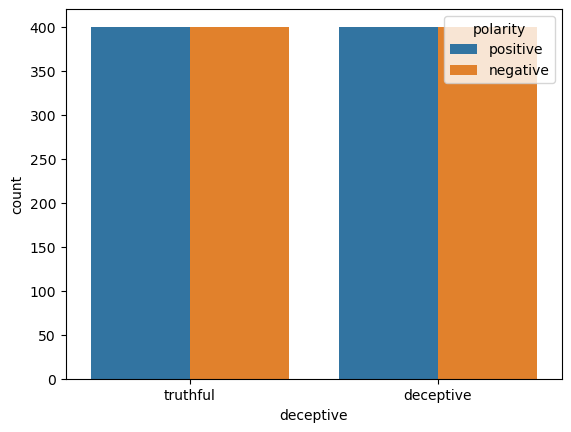

In [271]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=df['deceptive'], hue='polarity', data = df)

<AxesSubplot:xlabel='deceptive', ylabel='count'>

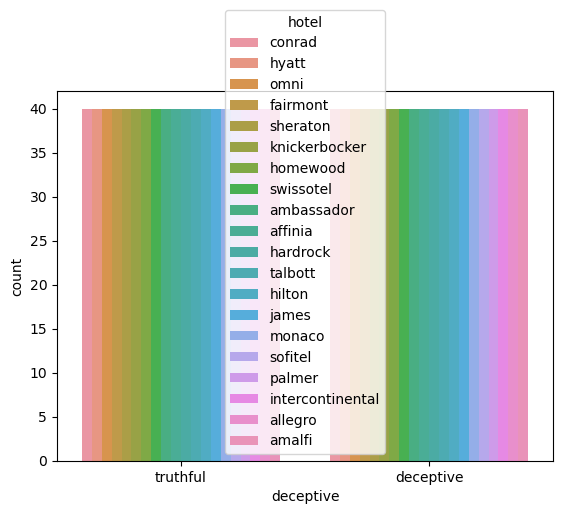

In [272]:
sns.countplot(x=df['deceptive'],hue='hotel',data=df)


In [273]:
df=df.drop(['hotel'],axis=1)


In [274]:
df

,deceptive,polarity,source,text
0,truthful,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,positive,TripAdvisor,I asked for a high floor away from the elevato...
...,...,...,...,...
1595,deceptive,negative,MTurk,Problems started when I booked the InterContin...
1596,deceptive,negative,MTurk,The Amalfi Hotel has a beautiful website and i...
1597,deceptive,negative,MTurk,The Intercontinental Chicago Magnificent Mile ...
1598,deceptive,negative,MTurk,"The Palmer House Hilton, while it looks good i..."


In [275]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import re
import string 
def text_cleaning(text):
    '''
        Make text lowercase, remove text in square brackets, remove link, remove special characters, 
        and remove words containing numbers.
    '''
    
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub('\\W'," ", text)
    text = re.sub('https?://\S+|www\.\S+','',text)
    text = re.sub('<.*?>+','',text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    
    return text


In [276]:
df['text']=df['text'].apply(text_cleaning)


In [277]:
df

,deceptive,polarity,source,text
0,truthful,positive,TripAdvisor,we stayed for a one night getaway with family ...
1,truthful,positive,TripAdvisor,triple a rate with upgrade to view room was le...
2,truthful,positive,TripAdvisor,this comes a little late as i m finally catchi...
3,truthful,positive,TripAdvisor,the omni chicago really delivers on all fronts...
4,truthful,positive,TripAdvisor,i asked for a high floor away from the elevato...
...,...,...,...,...
1595,deceptive,negative,MTurk,problems started when i booked the intercontin...
1596,deceptive,negative,MTurk,the amalfi hotel has a beautiful website and i...
1597,deceptive,negative,MTurk,the intercontinental chicago magnificent mile ...
1598,deceptive,negative,MTurk,the palmer house hilton while it looks good i...


In [278]:
df

,deceptive,polarity,source,text
0,truthful,positive,TripAdvisor,we stayed for a one night getaway with family ...
1,truthful,positive,TripAdvisor,triple a rate with upgrade to view room was le...
2,truthful,positive,TripAdvisor,this comes a little late as i m finally catchi...
3,truthful,positive,TripAdvisor,the omni chicago really delivers on all fronts...
4,truthful,positive,TripAdvisor,i asked for a high floor away from the elevato...
...,...,...,...,...
1595,deceptive,negative,MTurk,problems started when i booked the intercontin...
1596,deceptive,negative,MTurk,the amalfi hotel has a beautiful website and i...
1597,deceptive,negative,MTurk,the intercontinental chicago magnificent mile ...
1598,deceptive,negative,MTurk,the palmer house hilton while it looks good i...


In [279]:
df['deceptive'].unique()

array(['truthful', 'deceptive'], dtype=object)

In [280]:
sentences=df['text'].values
y=df['deceptive'].values


In [281]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le = LabelEncoder()
y = le.fit_transform(y)

In [282]:
!pip3 install keras

In [283]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences



sentences_train, sentences_test, y_train, y_test = train_test_split(sentences,y, test_size=0.2, random_state=1000)

sentences_train, sentences_val, y_train, y_val = train_test_split(sentences_train, y_train, 
    test_size=0.25, random_state= 8) # 0.25 x 0.8 = 0.2

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)

x_train = tokenizer.texts_to_sequences(sentences_train)
x_test = tokenizer.texts_to_sequences(sentences_test)
x_val = tokenizer.texts_to_sequences(sentences_val)

# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1
maxlen = 100

x_train = pad_sequences(x_train, padding = 'post', maxlen=maxlen)
x_test = pad_sequences(x_test, padding = 'post', maxlen=maxlen)
x_val = pad_sequences(x_val, padding='post',maxlen=maxlen)


In [284]:
x_train

array([[  51, 1468, 1081, ...,  427,  242,  552],
       [2407,   15,   12, ...,  418,   96,   57],
       [  13,   17,   50, ...,   17,  828, 1797],
       ...,
       [  40,    2, 1434, ...,   14,   18,   94],
       [   4,  123,   11, ...,   82, 2956,   36],
       [ 268,   73,  980, ...,   19,   18,    8]], dtype=int32)

In [285]:
x_train.shape

(960, 100)

In [286]:
x_test

array([[ 101,    1,    8, ...,   15,   96,  233],
       [   2,    1,  562, ...,   87, 1988,   29],
       [  23,   15,  166, ...,    7,    1,  662],
       ...,
       [  15,  157,    2, ...,   64,    0,    0],
       [  36, 1405,   11, ...,   63,  246,   64],
       [  96,   87,   25, ...,  361,  700,  126]], dtype=int32)

In [287]:
# from keras.models import Sequential
# from keras import layers
# import tensorflow as tf
# from tensorflow.keras.layers import Embedding, Conv1D, LSTM, Dense

# embedding_dim = 100
# from tensorflow.keras.callbacks import EarlyStopping
# reg = tf.keras.regularizers.l1(0.001)
# early_stop = EarlyStopping(monitor='val_loss', patience=20)

# model = Sequential()

# model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))



# model.add(layers.Conv1D(256, 10, padding='valid',activation='relu',strides = 2,kernel_regularizer=tf.keras.regularizers.l2(0.001)))
# model.add(layers.MaxPooling1D(2))
# model.add(layers.Dropout(0.5))
# model.add(layers.Conv1D(32, 5, activation='relu'))
# model.add(layers.MaxPooling1D(2))
# model.add(layers.Dropout(0.5))
# model.add(layers.Conv1D(16, 5, activation='relu'))
# model.add(layers.MaxPooling1D(2))
# model.add(layers.Dropout(0.5))
# model.add(layers.Flatten())
# model.add(layers.Dense(1, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l1(0.007)))
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])
# history = model.fit(x_train, y_train,
#                     epochs=50,
#                     validation_data=(x_val, y_val),
#                     batch_size=10)

In [288]:
from keras.models import Sequential
from keras import layers
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Conv1D, LSTM, Dense

embedding_dim = 100
from tensorflow.keras.callbacks import EarlyStopping
reg = tf.keras.regularizers.l2(0.001)
early_stop = EarlyStopping(monitor='val_loss', patience=20)

model = Sequential()
reg1 = tf.keras.regularizers.l2(0.001)


model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
# model.add(layers.Conv1D(256, 10, padding='valid', strides = 2, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
# model.add(layers.Dropout(rate = 0.5))
# model.add(layers.GlobalMaxPooling1D())
# model.add(layers.Dropout(rate = 0.5))


model.add(layers.Conv1D(128, 3, padding='valid',activation='relu',strides = 2, kernel_regularizer=reg1))
model.add(layers.MaxPooling1D(2))
model.add(layers.Dropout(0.2))
# model.add(layers.Conv1D(256, 5, activation='relu'))
# model.add(layers.MaxPooling1D(2))
# model.add(layers.Dropout(0.5))
# model.add(layers.Conv1D(128, 5, activation='relu'))
# model.add(layers.MaxPooling1D(2))
# model.add(layers.Dropout(0.5))
model.add(layers.Flatten())

# model.add(layers.Conv1D(128, 10, padding='valid', strides = 2, activation='relu'))
# model.add(layers.Dropout(rate = 0.5))
# model.add(layers.GlobalMaxPooling1D())
# model.add(layers.Dropout(rate = 0.5))





# model.add(layers.Conv1D(256, 10, padding='valid', strides = 2, activation='relu'))
# model.add(layers.GlobalMaxPooling1D())

# model.add(layers.Dense(250, activation='relu'))
# model.add(layers.Dense(250)

# model.add(layers.Conv1D(256, 10, padding='valid', strides = 2, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))


# model.add(layers.GlobalMaxPooling1D())
# model.add(layers.Dropout(rate = 0.5))
# model.add(layers.GlobalMaxPooling1D())
# model.add(layers.Dropout(rate = 0.5))






# model.add(layers.LSTM(128))

# model.add(Activation('relu'))
model.add(layers.Dense(1, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(0.1)))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    epochs=30,
                    validation_data=(x_val, y_val),
                    batch_size=32)

Epoch 1/30
30/30 [==============================] - 1s 14ms/step - loss: 0.8692 - accuracy: 0.4823 - val_loss: 0.7806 - val_accuracy: 0.5437
Epoch 2/30
30/30 [==============================] - 0s 10ms/step - loss: 0.7499 - accuracy: 0.6073 - val_loss: 0.7338 - val_accuracy: 0.4625
Epoch 3/30
30/30 [==============================] - 0s 10ms/step - loss: 0.7196 - accuracy: 0.6594 - val_loss: 0.7115 - val_accuracy: 0.5500
Epoch 4/30
30/30 [==============================] - 0s 10ms/step - loss: 0.7044 - accuracy: 0.5281 - val_loss: 0.7026 - val_accuracy: 0.4625
Epoch 5/30
30/30 [==============================] - 0s 10ms/step - loss: 0.6976 - accuracy: 0.5094 - val_loss: 0.6972 - val_accuracy: 0.4625
Epoch 6/30
30/30 [==============================] - 0s 9ms/step - loss: 0.6944 - accuracy: 0.5094 - val_loss: 0.6963 - val_accuracy: 0.4625
Epoch 7/30
30/30 [==============================] - 0s 9ms/step - loss: 0.6911 - accuracy: 0.5167 - val_loss: 0.6928 - val_accuracy: 0.5312
Epoch 8/30
30/3

In [289]:
# from keras.models import Sequential
# from keras import layers

# embedding_dims = 100
# batch_size = 32
# filters = 250
# kernel_size = 3
# hidden_dims = 250
# epochs = 50



# model = Sequential()
# model.add(layers.Conv1D(filters,kernel_size,padding = 'valid' , activation = 'relu',strides = 1 , 
#                  input_shape = (maxlen,embedding_dims)))
# model.add(layers.GlobalMaxPooling1D())
# model.add(layers.Dense(hidden_dims))
# model.add(layers.Dropout(0.2))
# model.add(layers.Activation('relu'))
# model.add(layers.Dense(1))
# model.add(layers.Activation('sigmoid'))

# model.compile(loss = 'binary_crossentropy',optimizer = 'adam', metrics = ['accuracy'])
# model.fit(x_train,y_train,batch_size = batch_size,epochs = epochs , validation_data = (x_test,y_test))
# # model = Sequential()
# # model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
# # model.add(layers.Conv1D(256, 5, activation='relu'))
# # model.add(layers.GlobalMaxPooling1D())
# # model.add(layers.Dense(100, activation='relu'))
# # model.add(layers.Dense(1, activation='sigmoid'))
# # model.compile(optimizer='adam',
# #               loss='binary_crossentropy',
# #               metrics=['accuracy'])
# # history = model.fit(x_train, y_train,
# #                     epochs=50,
# #                     validation_data=(x_test, y_test),
# #                     batch_size=10)

Epochs = 40-60

# Test the model on Validation data

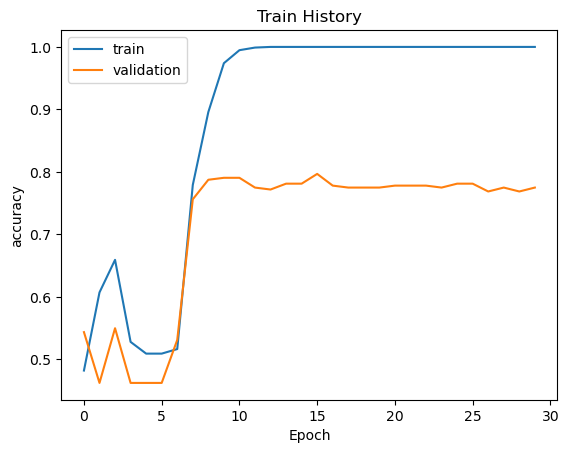

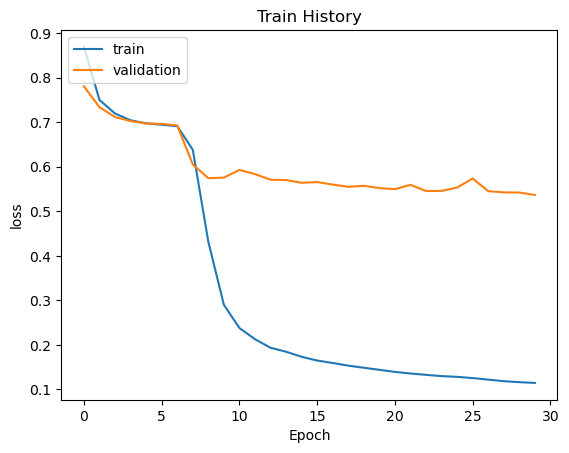

In [290]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
show_train_history(history,'accuracy','val_accuracy')
show_train_history(history,'loss','val_loss')

In [291]:
print('Training loss \t', history.history['loss'][-1]*100)
print('Training accuracy ',  history.history['accuracy'][-1]*100)
print('Validation loss ', history.history['val_loss'][-1]*100)
print('Validation accuracy ',  history.history['val_accuracy'][-1]*100)

Training loss 	 11.447815597057343
Training accuracy  100.0
Validation loss  53.66241931915283
Validation accuracy  77.49999761581421


In [292]:
new_text = "I love this hotel. The staff is very friendly. I don't think there is any places as good as this"
new_sequence = tokenizer.texts_to_sequences([new_text])
new_data = pad_sequences(new_sequence, maxlen=maxlen)
prediction = model.predict(new_data)
prediction_label = np.round(prediction[0][0])
print(prediction_label)
print("truthful" if prediction_label==1 else "deceptive")

1/1 [==============================] - 0s 50ms/step
0.0
deceptive


In [293]:
new_text = "During my holiday at Bali, I stayed at Hilton hotel. We arrived there at 12am. There was no staff. No one is coming to help us. We have to carry our luggae to the room. There was monkey everywhere. My girlfriend is afraid of monkey and she's not coming to the room. She has a terrible experience. So am I. If only we can get rid of the monkey and the staff is helpful, that would be nice. Why? because the place itself is big and the room is comfortable. The environment is good except the monkey. The service is kind of not so good."
new_sequence = tokenizer.texts_to_sequences([new_text])
new_data = pad_sequences(new_sequence, maxlen=maxlen)
prediction = model.predict(new_data)
prediction_label = np.round(prediction[0][0])
print(prediction_label)
print("truthful" if prediction_label==1 else "deceptive")

1/1 [==============================] - 0s 16ms/step
0.0
deceptive


In [294]:
new_text = "We planned to stay for 5 nights on a family trip. I booked this hotel because of the expected value for a suite as well as the free breakfast - get a quick bite, then head out for the day to do normal tourist stuff. Well, our stay here lasted 1 night and we quickly, and thankfully, switched to a different hotel for our last 4 nights. The room was dirty. When we opened the sofabed, the sheets were filthy and there was a mess of dirt and crumbs that fell out. Ridiculous considering this is a suite hotel where the sofabeds are likely used, and theoretically cleaned, a lot. Extra blankets were also dirty and bathrooms weren't much better. Temperature control in the room was imprecise - minor inconvenience but without clean blankets on our only night, it made for a cold stay. If you like to eat for free (they have free breakfasts and dinner on certain nights) and don't care to eat the great food Chicago has to offer, I guess some may find this place tolerable. But we found the buffet no better than average and felt like we were at a Golden Corral. The only thing this hotel really has going for it is location but there are other options in this area (we switched to The James and had a great experience). I couldn't be paid to stay here again. I'm shocked by the high overall rating given our experience."
new_sequence = tokenizer.texts_to_sequences([new_text])
new_data = pad_sequences(new_sequence, maxlen=maxlen)
prediction = model.predict(new_data)
prediction_label = np.round(prediction[0][0])
print(prediction_label)
print("truthful" if prediction_label==1 else "deceptive")

1/1 [==============================] - 0s 15ms/step
1.0
truthful


In [295]:
new_text = "I had to do a little research on the Hilton brand because it's not one that I was familiar with. I wanted to know what this hotel chain's reputation was, so I did a little research online and found out that it's pretty well-known as a chain that people book into for their business trips and vacations. I also found out that this hotel chain is pretty well-reviewed by people who have stayed in their hotels."
new_sequence = tokenizer.texts_to_sequences([new_text])
new_data = pad_sequences(new_sequence, maxlen=maxlen)
prediction = model.predict(new_data)
prediction_label = np.round(prediction[0][0])
print(prediction_label)
print("truthful" if prediction_label==1 else "deceptive")

1/1 [==============================] - 0s 15ms/step
0.0
deceptive


In [296]:
from sklearn.metrics import classification_report

y_pred = np.round(model.predict(x_val).ravel())
print (classification_report(y_test, y_pred))


10/10 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.54      0.60      0.57       157
           1       0.57      0.51      0.54       163

    accuracy                           0.55       320
   macro avg       0.55      0.55      0.55       320
weighted avg       0.55      0.55      0.55       320



In [297]:
y_pred = np.round(model.predict(x_val).ravel())


10/10 [==============================] - 0s 1ms/step


In [298]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_val,y_pred))

0.775


In [299]:
y_pred_label = []
for i in y_pred:
    if i == 1:
        y_pred_label.append("truthful")
    else:
        y_pred_label.append("deceptive")


In [300]:
y_val_label = []
for i in y_val:
    if i == 1:
        y_val_label.append("truthful")
    else:
        y_val_label.append("deceptive")



In [301]:
from sklearn.model_selection import KFold
import numpy as np

k = 5
kf = KFold(n_splits=k)
scores = []

for train_index, test_index in kf.split(sentences):
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]
    
    model.fit(x_train, y_train, epochs=5)
    scores.append(model.evaluate(x_val, y_val))

print("Avg. cross-val accuracy:", np.mean(scores))



Epoch 1/5
30/30 [==============================] - 0s 8ms/step - loss: 0.1132 - accuracy: 1.0000
Epoch 2/5
30/30 [==============================] - 0s 8ms/step - loss: 0.1108 - accuracy: 1.0000
Epoch 3/5
30/30 [==============================] - 0s 8ms/step - loss: 0.1111 - accuracy: 1.0000
Epoch 4/5
30/30 [==============================] - 0s 8ms/step - loss: 0.1078 - accuracy: 1.0000
Epoch 5/5
10/10 [==============================] - 0s 2ms/step - loss: 0.5382 - accuracy: 0.7844
Epoch 1/5
30/30 [==============================] - 0s 8ms/step - loss: 0.1034 - accuracy: 1.0000
Epoch 2/5
30/30 [==============================] - 0s 8ms/step - loss: 0.1024 - accuracy: 1.0000
Epoch 3/5
30/30 [==============================] - 0s 7ms/step - loss: 0.1004 - accuracy: 1.0000
Epoch 4/5
30/30 [==============================] - 0s 7ms/step - loss: 0.0991 - accuracy: 1.0000
Epoch 5/5
10/10 [==============================] - 0s 2ms/step - loss: 0.5361 - accuracy: 0.7812
Epoch 1/5
30/30 [=============

In [302]:
predict_test = pd.DataFrame({'Val':sentences_val, 'Pred':y_pred_label, 'True_label':y_val_label}, columns=['Val','Pred','True_label'])
predict_test['result'] = np.where(predict_test['Pred']==predict_test['True_label'], 1, 0)
# results.sort_values(by='result').head(20)


predict_test.sort_values(by='result')

,Val,Pred,True_label,result
0,overall the hotel is beautiful the service w...,truthful,deceptive,0
182,i had a great time here it is centerally loca...,deceptive,truthful,0
179,i was not at all impressed with my stay at the...,truthful,deceptive,0
173,my stay at the homewood suites in downtown chi...,truthful,deceptive,0
170,it is always interesting going to a high quali...,deceptive,truthful,0
...,...,...,...,...
155,this is a stylish hotel located right on north...,truthful,truthful,1
156,complete disappointment problems the alarm...,truthful,truthful,1
43,the omni chicago hotel offers all the great am...,deceptive,deceptive,1
143,very disappointed in our stay in chicago monoc...,truthful,truthful,1


In [303]:
wrong = 0
right = 0
for i in predict_test['result']:
    
    if i == 0:
        wrong+=1
    else:
        right+=1

print("The wrong guess is : ", wrong)
print("The right guess is: ", right)

The wrong guess is :  72
The right guess is:  248


In [304]:
def num_decep_truth(pred):
    num_deceptive = 0
    num_truthful = 0

    for i in pred:
        if i == 'deceptive':
            num_deceptive+=1
        elif i == 'truthful':
            num_truthful+=1
    return {"num_deceptive":num_deceptive,"num_truthful":num_truthful}

In [305]:
num_decep_truth(y_pred_label)

{'num_deceptive': 174, 'num_truthful': 146}

In [306]:
num_decep_truth(y_val_label)

{'num_deceptive': 172, 'num_truthful': 148}

# Test the created model on test data and see it performance 


In [307]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_pred))

0.553125


In [308]:
from sklearn.model_selection import KFold
import numpy as np

k = 5
kf = KFold(n_splits=k)
scores = []

for train_index, test_index in kf.split(sentences):
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]
    
    model.fit(x_train, y_train, epochs=5)
    scores.append(model.evaluate(x_test, y_test))

print("Avg. cross-val accuracy:", np.mean(scores))


Epoch 1/5
30/30 [==============================] - 0s 7ms/step - loss: 0.0818 - accuracy: 1.0000
Epoch 2/5
30/30 [==============================] - 0s 7ms/step - loss: 0.0808 - accuracy: 1.0000
Epoch 3/5
30/30 [==============================] - 0s 7ms/step - loss: 0.0800 - accuracy: 1.0000
Epoch 4/5
30/30 [==============================] - 0s 8ms/step - loss: 0.0797 - accuracy: 1.0000
Epoch 5/5
10/10 [==============================] - 0s 2ms/step - loss: 0.5038 - accuracy: 0.7969
Epoch 1/5
30/30 [==============================] - 0s 7ms/step - loss: 0.0779 - accuracy: 1.0000
Epoch 2/5
30/30 [==============================] - 0s 7ms/step - loss: 0.0773 - accuracy: 1.0000
Epoch 3/5
30/30 [==============================] - 0s 7ms/step - loss: 0.0772 - accuracy: 1.0000
Epoch 4/5
30/30 [==============================] - 0s 7ms/step - loss: 0.0764 - accuracy: 1.0000
Epoch 5/5
10/10 [==============================] - 0s 2ms/step - loss: 0.4960 - accuracy: 0.8062
Epoch 1/5
30/30 [=============

In [309]:
from sklearn.metrics import classification_report

print (classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.54      0.60      0.57       157
           1       0.57      0.51      0.54       163

    accuracy                           0.55       320
   macro avg       0.55      0.55      0.55       320
weighted avg       0.55      0.55      0.55       320



In [310]:
y_test_label = []
for i in y_test:
    if i == 1:
        y_test_label.append("truthful")
    else:
        y_test_label.append("deceptive")


# y_test_label

In [311]:
predict_test = pd.DataFrame({'Test':sentences_test, 'Pred':y_pred_label, 'True_label':y_test_label}, columns=['Test','Pred','True_label'])
predict_test['result'] = np.where(predict_test['Pred']==predict_test['True_label'], 1, 0)
# results.sort_values(by='result').head(20)


predict_test.sort_values(by='result')

,Test,Pred,True_label,result
159,recently i traveled to chicago for a business...,truthful,deceptive,0
256,my husband and i visited the fairmont chicago ...,truthful,deceptive,0
255,first room s heating system sounded like we ha...,deceptive,truthful,0
118,the intercontinental chicago magnificent mile ...,truthful,deceptive,0
254,last month my husband and i stayed at the int...,truthful,deceptive,0
...,...,...,...,...
145,was one of the worst travel experiences of qui...,truthful,truthful,1
148,my significant other and i recently spent nig...,truthful,truthful,1
149,hotel monaco is in a really great location on...,truthful,truthful,1
151,my husband and i stayed at the hyatt regency w...,deceptive,deceptive,1


In [312]:
wrong = 0
right = 0
for i in predict_test['result']:
    
    if i == 0:
        wrong+=1
    else:
        right+=1

print("The wrong guess is : ", wrong)
print("The right guess is: ", right)
    


        

The wrong guess is :  143
The right guess is:  177


In [313]:
def num_decep_truth(pred):
    num_deceptive = 0
    num_truthful = 0

    for i in pred:
        if i == 'deceptive':
            num_deceptive+=1
        elif i == 'truthful':
            num_truthful+=1
    return {"num_deceptive":num_deceptive,"num_truthful":num_truthful}

In [314]:
num_decep_truth(y_pred_label)

{'num_deceptive': 174, 'num_truthful': 146}

In [315]:
num_decep_truth(y_test_label)

{'num_deceptive': 157, 'num_truthful': 163}

In [316]:
import pickle
pkl = open('model2.pkl', 'rb');
clf = pickle.load(pkl);

new_text = "During my holiday at Bali, I stayed at Hilton hotel. We arrived there at 12am. There was no staff. No one is coming to help us. We have to carry our luggae to the room. There was monkey everywhere. My girlfriend is afraid of monkey and she's not coming to the room. She has a terrible experience. So am I. If only we can get rid of the monkey and the staff is helpful, that would be nice. Why? because the place itself is big and the room is comfortable. The environment is good except the monkey. The service is kind of not so good."
new_sequence = tokenizer.texts_to_sequences([new_text])
# print(new_sequence)
new_data = pad_sequences(new_sequence, maxlen=maxlen)
# print(new_data)
prediction = clf.predict(new_data)
print(prediction)
prediction_label = np.round(prediction[0][0])
print(prediction_label)
print("truthful" if prediction_label==1 else "deceptive")



Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-04-06 13:05:02         4041
metadata.json                                  2023-04-06 13:05:02           64
variables.h5                                   2023-04-06 13:05:02     33560544
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......bidirectional
.........backward_layer
............cell
...............vars
..................0
..................1
..................2
............vars
.........forward_layer
............cell
...............vars
..................0
..................1
..................2
............vars
.........layer
............cell
...............vars
............vars
.........vars
......conv1d
.........vars
............0
............1
......dense
.........vars
............0
............1
......dropout
.........vars
......embedding
.........vars
............0
......input_laye

In [317]:
new_text = "We planned to stay for 5 nights on a family trip. I booked this hotel because of the expected value for a suite as well as the free breakfast - get a quick bite, then head out for the day to do normal tourist stuff. Well, our stay here lasted 1 night and we quickly, and thankfully, switched to a different hotel for our last 4 nights. The room was dirty. When we opened the sofabed, the sheets were filthy and there was a mess of dirt and crumbs that fell out. Ridiculous considering this is a suite hotel where the sofabeds are likely used, and theoretically cleaned, a lot. Extra blankets were also dirty and bathrooms weren't much better. Temperature control in the room was imprecise - minor inconvenience but without clean blankets on our only night, it made for a cold stay. If you like to eat for free (they have free breakfasts and dinner on certain nights) and don't care to eat the great food Chicago has to offer, I guess some may find this place tolerable. But we found the buffet no better than average and felt like we were at a Golden Corral. The only thing this hotel really has going for it is location but there are other options in this area (we switched to The James and had a great experience). I couldn't be paid to stay here again. I'm shocked by the high overall rating given our experience."
new_sequence = tokenizer.texts_to_sequences([new_text])
# print(new_sequence)
new_data = pad_sequences(new_sequence, maxlen=maxlen)
# print(new_data)
prediction = clf.predict(new_data)
print(prediction)
print(prediction[0][0])
prediction_label = np.round(prediction[0][0])
print("truthful" if prediction_label==1 else "deceptive")

1/1 [==============================] - 0s 20ms/step
[[0.9841811]]
0.9841811
truthful


# Testing using Expedia Dataset

In [318]:
new_text = "I booked flights through expedia.co.uk I had to cancel due to a medical emergency. One airline (outbound) refunded tax directly. The other airline (return) said I was eligible for a tax refund, but that I had to go through expedia as the agent. Expedia claims that the tax is non-refundable, as the flights are non-refundable. Airlines do not pay tax for seats that have not been used. So who is profiting from the un-used tax? My guess is Expedia since the airline was happy to refund."
new_sequence = tokenizer.texts_to_sequences([new_text])
# print(new_sequence)
new_data = pad_sequences(new_sequence, maxlen=maxlen)
# print(new_data)
prediction = clf.predict(new_data)
print(prediction)
print(prediction[0][0])
prediction_label = np.round(prediction[0][0])
print("truthful" if prediction_label==1 else "deceptive")

1/1 [==============================] - 0s 19ms/step
[[0.9977673]]
0.9977673
truthful


In [319]:
new_text = "I booked a hotel stay with 15 days parking package and upon checking in at LGW hotel was told that they had no record of the number of days free parking. Expedia didn’t help at all, and even though my confirmation stated ‘free parking’ it didn’t say ‘15 days free parking’ and so Expedia say that my parking is all due to be paid myself for 15 days, despite me booking the specific package for £172. I won’t be using these muppets ever again, I’ve had to fork out parking to the hotel also. Not a happy Chappy. Avoid Expedia park and stay packages like the plague !!"
new_sequence = tokenizer.texts_to_sequences([new_text])
# print(new_sequence)
new_data = pad_sequences(new_sequence, maxlen=maxlen)
# print(new_data)
prediction = clf.predict(new_data)
print(prediction)
print(prediction[0][0])
prediction_label = np.round(prediction[0][0])
print("truthful" if prediction_label==1 else "deceptive")

1/1 [==============================] - 0s 20ms/step
[[0.9974558]]
0.9974558
truthful


# Test on unseen dataset from different distribution

In [320]:
new_text = "Love this!  Well made, sturdy, and very comfortable.  I love it!Very pretty"

new_sequence = tokenizer.texts_to_sequences([new_text])
# print(new_sequence)
new_data = pad_sequences(new_sequence, maxlen=maxlen)
# print(new_data)
prediction = clf.predict(new_data)
print(prediction)
print(prediction[0][0])
prediction_label = np.round(prediction[0][0])
print("truthful" if prediction_label==1 else "deceptive")
# right

1/1 [==============================] - 0s 21ms/step
[[0.01833783]]
0.018337835
deceptive


In [321]:
new_text = "What can you say--- cheap and it works as intended."

new_sequence = tokenizer.texts_to_sequences([new_text])
# print(new_sequence)
new_data = pad_sequences(new_sequence, maxlen=maxlen)
# print(new_data)
prediction = clf.predict(new_data)
print(prediction)
print(prediction[0][0])
prediction_label = np.round(prediction[0][0])
print("truthful" if prediction_label==1 else "deceptive")
# wrong

1/1 [==============================] - 0s 19ms/step
[[0.01816325]]
0.018163249
deceptive


In [322]:
new_text = "Really ruff under your feet, it feels very sturdy. I will keep my feet in the chair"

new_sequence = tokenizer.texts_to_sequences([new_text])
# print(new_sequence)
new_data = pad_sequences(new_sequence, maxlen=maxlen)
# print(new_data)
prediction = clf.predict(new_data)
print(prediction)
print(prediction[0][0])
prediction_label = np.round(prediction[0][0])
print("truthful" if prediction_label==1 else "deceptive")
# wrong

1/1 [==============================] - 0s 19ms/step
[[0.01676639]]
0.016766394
deceptive


In [323]:
new_text = "Order to place special photos on the wall.  We've had it for a couple of weeks and"

new_sequence = tokenizer.texts_to_sequences([new_text])
# print(new_sequence)
new_data = pad_sequences(new_sequence, maxlen=maxlen)
# print(new_data)
prediction = clf.predict(new_data)
print(prediction)
print(prediction[0][0])
prediction_label = np.round(prediction[0][0])
print("truthful" if prediction_label==1 else "deceptive")
# right

1/1 [==============================] - 0s 19ms/step
[[0.01336809]]
0.013368085
deceptive


In [324]:
new_text = "excellent product if you are a side sleeper this is perfect"

new_sequence = tokenizer.texts_to_sequences([new_text])
# print(new_sequence)
new_data = pad_sequences(new_sequence, maxlen=maxlen)
# print(new_data)
prediction = clf.predict(new_data)
print(prediction)
print(prediction[0][0])
prediction_label = np.round(prediction[0][0])
print("truthful" if prediction_label==1 else "deceptive")
# wrong

1/1 [==============================] - 0s 21ms/step
[[0.01567408]]
0.015674084
deceptive


In [325]:
new_text = "Great product. Arrived on time and matched my shower curtain perfectly."

new_sequence = tokenizer.texts_to_sequences([new_text])
# print(new_sequence)
new_data = pad_sequences(new_sequence, maxlen=maxlen)
# print(new_data)
prediction = clf.predict(new_data)
print(prediction)
print(prediction[0][0])
prediction_label = np.round(prediction[0][0])
print("truthful" if prediction_label==1 else "deceptive")
# wrong

1/1 [==============================] - 0s 21ms/step
[[0.00509354]]
0.005093537
deceptive


In [326]:
new_text = "Perfection. Beyond easy to use, minimal effort, fast and perfect froth."

new_sequence = tokenizer.texts_to_sequences([new_text])
# print(new_sequence)
new_data = pad_sequences(new_sequence, maxlen=maxlen)
# print(new_data)
prediction = clf.predict(new_data)
print(prediction)
print(prediction[0][0])
prediction_label = np.round(prediction[0][0])
print("truthful" if prediction_label==1 else "deceptive")
# wrong

1/1 [==============================] - 0s 19ms/step
[[0.00608984]]
0.006089843
deceptive


In [327]:
df_test = pd.read_csv('../FakeReviewDataset.csv')
df_test

,category,rating,label,text_
0,Home_and_Kitchen_5,5,deceptive,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5,deceptive,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5,deceptive,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1,deceptive,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5,deceptive,Very nice set. Good quality. We have had the s...
...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry_5,4,truthful,I had read some reviews saying that this bra r...
40428,Clothing_Shoes_and_Jewelry_5,5,deceptive,I wasn't sure exactly what it would be. It is ...
40429,Clothing_Shoes_and_Jewelry_5,2,truthful,"You can wear the hood by itself, wear it with ..."
40430,Clothing_Shoes_and_Jewelry_5,1,deceptive,I liked nothing about this dress. The only rea...


In [328]:
x = df_test['text_']
y_val = df_test['label']

In [329]:
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, padding = 'post', maxlen=maxlen)


In [330]:
y_pred = np.round(model.predict(x).ravel())
y_pred

1264/1264 [==============================] - 2s 1ms/step


array([0., 1., 0., ..., 0., 1., 1.], dtype=float32)

In [331]:
y_pred_label_test = []
for i in y_pred:
    if i == 1:
        y_pred_label_test.append("truthful")
    else:
        y_pred_label_test.append("deceptive")

        
y_label_test = []
for i in y_val:
    if i == 1:
        y_label_test.append("truthful")
    else:
        y_label_test.append("deceptive")


In [332]:
predict_val = pd.DataFrame({'dataTest':df_test['text_'], 'Pred':y_pred_label_test, 'True_label':y_label_test}, columns=['dataTest','Pred','True_label'])
predict_val['result'] = np.where(predict_val['Pred']==predict_val['True_label'], 1, 0)
# results.sort_values(by='result').head(20)


predict_val.sort_values(by='result')

,dataTest,Pred,True_label,result
20215,My girl chichi likes it I actually put it insi...,truthful,deceptive,0
24532,I love Noelle Adams's writing! She has an ama...,truthful,deceptive,0
24530,There is nothing here that makes me want to re...,truthful,deceptive,0
24529,I really liked the series and will be reading ...,truthful,deceptive,0
24527,This was a cute story that will make you laugh...,truthful,deceptive,0
...,...,...,...,...
7273,I had never had an issue with the quality of t...,deceptive,deceptive,1
28651,Great book. Those guys are an amazing bunch. I...,deceptive,deceptive,1
28652,Unnecessarily complicated. It seemed like a st...,deceptive,deceptive,1
28618,Excellent! So glad to have read the book! I ...,deceptive,deceptive,1


In [333]:
wrong = 0
right = 0
for i in predict_val['result']:
    
    if i == 0:
        wrong+=1
    else:
        right+=1

print("The wrong guess is : ", wrong)
print("The right guess is: ", right)
    

The wrong guess is :  25180
The right guess is:  15252
